In [45]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust

from scipy import stats
import seaborn as sns
import matplotlib.pylab as plt
import pickle

from scipy.stats import t

### Distribución de Cola Larga

In [2]:
df = pd.read_csv(r'./data/sp500_data.csv.gz')

In [3]:
# Rentabilidad de las acciones en Netflix
df.NFLX

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
5642   -0.590004
5643   -2.211433
5644    0.725716
5645    0.491432
5646   -1.170006
Name: NFLX, Length: 5647, dtype: float64

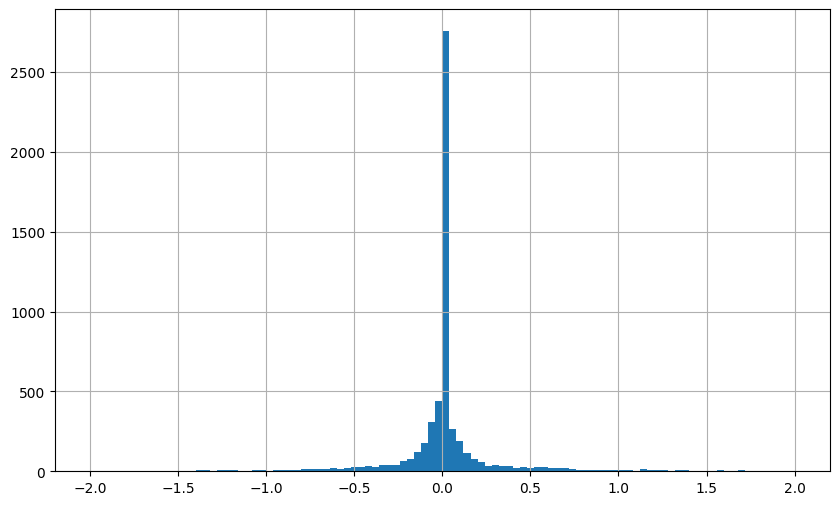

In [22]:
#Distibución de la variable objetivo precio

# Crear la figura con el tamaño deseado
plt.figure(figsize=(10, 6))

# Trabajar con los ejes de la figura
ax = plt.gca()

df.NFLX.hist(bins = 100, range=(-2,2), ax=ax)


plt.grid(True)
plt.show()

La distribución tiene una "cola" alargada ligeramente mas larga hacia a la derecha, es decir la distribución es sesgada a la derecha.

#### Diagrama QQ (Quantile-Quantile) 

- Visualiza la cercanía de una muestra a una distribución normal.

- La proximidad de los puntos a la línea diagonal indica la similitud con la distribución normal.

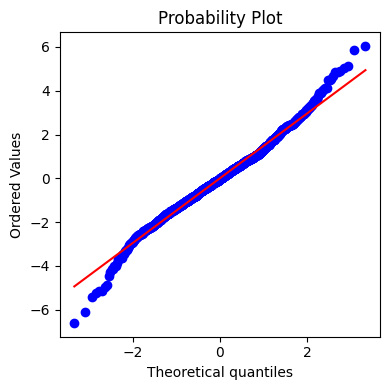

In [8]:
nflx = df.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

Observaciones :

- La distribución normal, también conocida como la distribución gaussiana, es simétrica y no tiene sesgo. 

- Los puntos están muy por debajo de la línea para valores bajos y muy por encima de la línea para valores altos, lo que indica que los datos no están distribuidosnormalmente.

- Es mucho más probable que observemos valores extremos de lo que cabría esperar si los datos tuvieran una distribución normal.

- Es importante tener en cuenta el sesgo al realizar análisis estadísticos y modelado, ya que algunos métodos y pruebas estadísticas asumen normalidad en los datos. Si los datos no siguen una distribución normal, pueden requerir transformaciones o el uso de métodos estadísticos no paramétricos. 


### Distribución T - Student

In [35]:
with open("data/data.pkl", "rb") as file:
    data = pickle.load(file)

In [42]:
data.precio.head(20)

0      885000.0
1      150000.0
2     1950000.0
3      380000.0
4      590000.0
5      380000.0
6      385000.0
7       75000.0
8      590000.0
9       64000.0
10     165000.0
11     790000.0
12     475000.0
13     900000.0
14     265000.0
16     290000.0
17     490000.0
18    2000000.0
19     200000.0
20     470000.0
Name: precio, dtype: float64

#### El intervalo de confianza 

- El intervalo de confianza es una medida estadística que proporciona un rango probable de valores para un parámetro poblacional, como la media.

- Se calcula a partir de una muestra y se utiliza para estimar dónde podría estar el verdadero valor del parámetro en la población completa, con cierto nivel de confianza.

- Cuando calculamos un intervalo de confianza para la media usando la t de Student, estamos construyendo un rango de valores dentro del cual creemos que se encuentra la verdadera media poblacional con un cierto nivel de confianza. La fórmula general :

<p align=center>
<img src="src/intervalo.png" height="90" width="490">
<p>

x es la media de la muestra. <br/>
t es el valor crítico de la distribución t de Student, dependiente del nivel de confianza y los grados de libertad (n−1 para una muestra).<br/>
s es la desviación estándar de la muestra.<br/>
n es el tamaño de la muestra.<br/>

- Cuando se trabaja con la distribución t de Student y se calcula un intervalo de confianza para la media poblacional, se obtiene un rango dentro del cual se espera que esté la verdadera media de la población, con cierta probabilidad. 

- Este rango se expresa como un intervalo, por ejemplo, un intervalo del 95% de confianza.

#### Cálculo del intervalo de confianza 

In [47]:

# Calcular la media y desviación estándar de la muestra
media_muestra = data['precio'].mean()
desviacion_muestra = data['precio'].std()

# Imprimir los resultados
print("Media de la muestra:", media_muestra)
print("Desviación estándar de la muestra:", desviacion_muestra)

# Definir el nivel de confianza y los grados de libertad
nivel_confianza = 0.95
grados_libertad = len(data) - 1

# Calcular el intervalo de confianza usando la distribución t
intervalo_confianza = t.interval(nivel_confianza, df=grados_libertad, loc=media_muestra, scale=desviacion_muestra / (len(data) ** 0.5))

# Imprimir el intervalo de confianza
print(f"Intervalo de confianza al {nivel_confianza * 100}% para la media poblacional:", intervalo_confianza)


Media de la muestra: 911168.6294109378
Desviación estándar de la muestra: 6801405.822644536
Intervalo de confianza al 95.0% para la media poblacional: (753082.3084325894, 1069254.950389286)


Esto significa que, basándonos en nuestra muestra y el método estadístico utilizado, estamos bastante seguros (con un nivel de confianza del 95%)
de que la verdadera media poblacional de los precios de viviendas se encuentra en algún lugar entre 753,082 y 1,069,254